<a href="https://colab.research.google.com/github/David-GHMM/ML-Lab3/blob/main/%D0%9C%D0%9E_%D0%9B%D0%A03_%D0%9C%D0%B0%D1%80%D0%B3%D0%B0%D1%80%D1%8F%D0%BD_%D0%9F%D0%98%D0%9D_231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 3
# Бинарная классификация

**Цель работы:** познакомиться с применением модели машинного обучения для решения задачи классификации (метод логистической регрессии)

Набор данных включает следующие атрибуты:
* **Age** – возраст клиента
* **Employment Type** – сектор, в котором работает клиент
* **Graduate Or Not** – независимо от того, окончил клиент колледж или нет
* **Annual Income** – годовой доход клиента (округлено до ближайших 50 тыс.)
* **Family Members** – количество членов семьи клиента
* **Chronic Disease** – страдает ли клиент какими-либо серьезными заболеваниями
или состояниями (диабет, высокое артериальное давление, астма и т.д.)
* **Frequent Flyer** – данные о часто летающих пассажирах, полученные на основе
истории бронирования авиабилетов клиентом как минимум в 4 различных случаях за
последние 2 года (2017–2019).
* **Ever Travelled Abroad** – выезжал ли клиент когда-либо в другую страну (не
обязательно с использованием услуг компании)
* **Travel Insurance** – приобретал ли клиент туристический страховой пакет во
время ознакомительного предложения, проведенного в 2019 г. (целевая переменная)

### 1. Импортируем библиотеки и загружаем данные

In [275]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [276]:
df = pd.read_csv("Travel.csv", index_col='Unnamed: 0')
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


Выведем целевую переменную, целевые имена и частоту каждого уникального значения:

In [277]:
(unique, counts) = np.unique(df['TravelInsurance'], return_counts=True)
print('Unique values of the target variable: ', unique)
print('Counts of the target variable: ', counts)

Unique values of the target variable:  [0 1]
Counts of the target variable:  [1277  710]


Построим столбчатую диаграмму, чтобы увидеть целевую переменную:

<Axes: xlabel='TravelInsurance', ylabel='count'>

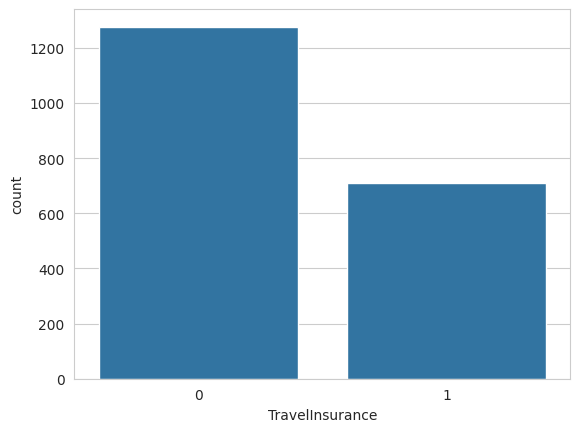

In [278]:
sns.set_style("whitegrid")
sns.countplot(df, x = 'TravelInsurance')

Анализ диаграммы показывает, что набор данных является сбалансированным

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 155.2+ KB


В этом наборе данных у нас есть два класса: 0 и 1, что делает эту задачу задачей бинарной классификации.

Выполним бинарную классификацию с использованием логистической регрессии с
помощью sklearn.

### 2. Проверяем наличие пропущенных значений и выбросов

In [280]:
# проверка на пропущенные значения
print(df.isnull().sum())

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64


<Axes: xlabel='Age'>

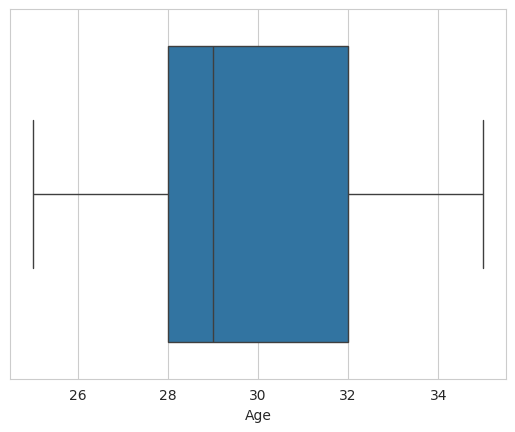

In [281]:
# проверка на выбросы
sns.boxplot(x=df['Age'])

### 3. Исключаем невлияющие категориальные признаки


#### **Объяснение по выбору признаков**

Мною был проведен анализ для поиска наилучшей выборки признаков, для этого были проанализированы различные комбинации признаков для исключения.

В результате получилась следующая таблица:

|№|Удаленные признаки|Accuracy|Precision|Recall|F1-мера|ROC AUC|
|:--:|:--|:--:|:--:|:--:|:--:|:--:|
|1|"FamilyMembers", "Employment Type"|0,781| 0,74| 0,54| 0,63| 0,77|
|2|"FamilyMembers", "Employment Type", "ChronicDiseases"| 0,779| 0,74| 0,54| 0,63| 0,77|
|3|"FamilyMembers"| 0,779| 0,74| 0,54| 0,62| 0,77|
|4|"Employment Type", "GraduateOrNot", "FamilyMembers"| 0,777| 0,74| 0,53| 0,62| 0,77|
|5|"FamilyMembers", "GraduateOrNot"| 0,775| 0,74| 0,53| 0,61| 0,77|
|6|"GraduateOrNot"| 0,767| 0,72| 0,52| 0,60| 0,77|
|7|"Employment Type", "GraduateOrNot"| 0,765| 0,71| 0,52| 0,60| 0,77|
|8|"Employment Type"| 0,761| 0,70| 0,51| 0,59| 0,77|


Также была получена следующая таблица корреляций для каждого параметра:

|index|Age|Employment Type|GraduateOrNot|AnnualIncome|FamilyMembers|ChronicDiseases|FrequentFlyer|EverTravelledAbroad|TravelInsurance|
|:--|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|Age|1\.0|0\.115|0\.0271|-0\.0201|0\.0274|0\.0073|-0\.033|-0\.0127|0\.061|
|Employment Type|0\.115|1\.0|0\.12|-0\.34|0\.0033|0\.0115|-0\.143|-0\.181|-0\.147|
|GraduateOrNot|0\.0271|0\.12|1\.0|0\.108|0\.0212|0\.0188|-0\.0281|0\.062|0\.0189|
|AnnualIncome|-0\.0201|-0\.34|0\.108|1\.0|-0\.0153|-0\.0011|0\.353|0\.486|0\.39|
|FamilyMembers|0\.0274|0\.0033|0\.0212|-0\.0153|1\.0|0\.0282|-0\.023|-0\.0207|0\.079|
|ChronicDiseases|0\.0073|0\.0115|0\.0188|-0\.0011|0\.0282|1\.0|-0\.043|0\.0212|0\.0181|
|FrequentFlyer|-0\.033|-0\.143|-0\.0281|0\.353|-0\.023|-0\.043|1\.0|0\.277|0\.232|
|EverTravelledAbroad|-0\.0127|-0\.181|0\.062|0\.486|-0\.0207|0\.0212|0\.277|1\.0|0\.433|
|TravelInsurance|0\.061|-0\.147|0\.0189|0\.39|0\.079|0\.0181|0\.232|0\.433|1\.0|

---
#### **Интерпретация результатов**

##### ***1. Почему удаление именно "FamilyMembers" и "Employment Type" дало лучший результат по Accuracy (0.781).***

По первой таблице видно, что:
* Удаление только "Employment Type" - ухудшает Accuracy (0,781 -> 0,761).
* Удаление только "FamilyMembers" - почти не влияет (0,781 -> 0,779).
* Но удаление обоих вместе даёт наилучший результат.

Попытаться объяснить это можно с помощью взаимной **корреляции** и **мультиколлинеарности**. Так, например, в корреляционной матрице видно следующее:
| Пара                                  | Корреляция                  |
| :------------------------------------ | :-------------------------- |
| Employment Type ↔ AnnualIncome        | **−0.35**                   |
| FamilyMembers ↔ Age                   | 0.027 (слабая, но ненулевая)|
| Employment Type ↔ FrequentFlyer       | **−0.14**                   |
| Employment Type ↔ EverTravelledAbroad | **−0.18**                   |

С помощью данной таблицы можно сделать следующие выводы:
* "Employment Type" частично дублирует информацию, которую уже содержат "AnnualIncome", "FrequentFlyer", "EverTravelledAbroad", т.е. этот признак создаёт "шумовые перекрёстные эффекты";
* Когда модель видит противоречивые сигналы — например, человек из государственного сектора (обычно "AnnualIncome" меньше), но с высоким доходом и частыми перелётами — веса логистической регрессии начинают компенсировать друг друга, ухудшая общую обобщающую способность.
* "FamilyMembers" добавляет ещё один источник разброса, слабо связанный с целевой переменной, но способный усилить "шум", особенно если в обучающей выборке часть людей с большими семьями - из госсектора.

В целом можно сказать, что удаление "Employment Type" и "FamilyMembers" убирает слабые и пересекающиеся факторы, которые создавали лишний шум.
Без них логистическая регрессия делает меньше “ложных уверенных” предсказаний - и поэтому немного выигрывает в Accuracy и F1.

##### ***2. Из матрицы корреляций видно, что у признаков "Age", "GraduateOrNot" и "ChronicDiseases" корреляция с целевым признаком меньше, но при этом их удаление либо не влияет на метрики модели, либо ухудшает их.***

Это можно объяснить тем, что **низкая корреляция ≠ бесполезный признак**.

Хоть и логистическая регрессия - линейная модель, но она учитывает вклад каждого признака в комбинации с другими. Даже слабокоррелирующие признаки могут улучшать предсказание, если они уточняют границы между группами внутри пространства данных.

Например, если "Age" сам по себе не определяет, купит ли клиент страховку, но в сочетании с "AnnualIncome" он начинает усиливать различие между покупателями и непокупателями. Можно сказать, что модель использует его как "корректирующий" фактор. Поэтому:

* "Age" уточняет связь между доходом ("AnnualIncome") и частотой путешествий ("FrequentFlyer");
* "GraduateOrNot" слабо коррелирует напрямую, но влияет на вероятность быть "FrequentFlyer" или иметь высокий доход;
* "ChronicDiseases" не определяет покупку напрямую, но повышает чувствительность к страховке у определенной подгруппы клиентов.

---

#### **Вывод**

“FamilyMembers” и “Employment Type” создают избыточность и шум, мешая модели обобщать. При этом “Age”, “GraduateOrNot” и “ChronicDiseases” хоть и слабо коррелируют, дают слабые уточнения по определённым сегментам клиентов.
Поэтому их сохранение повышает устойчивость и точность модели, особенно по F1 и Recall.

Но, в отличии от Accuracy, Precision и Recall, ROC AUC измеряет способность модели различать классы вообще - **независимо от порога**.

Таким образом, когда удаляются слабо влияющие признаки, геометрия разделяющей границы почти не меняется, но распределение вероятностей немного смещается — из-за чего Accuracy немного меняется, а ROC AUC остаётся примерно тем же.

In [282]:
df_copy = df.copy()

df_copy.drop("Employment Type", axis=1, inplace=True)
df_copy.drop("FamilyMembers", axis=1, inplace=True)

df_copy.head()

,Age,GraduateOrNot,AnnualIncome,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Yes,400000,1,No,No,0
1,31,Yes,1250000,0,No,No,0
2,34,Yes,500000,1,No,No,1
3,28,Yes,700000,1,No,No,0
4,28,Yes,700000,1,Yes,No,0


Признаки "GraduateOrNot", Frequent Flyer" и "Ever Travelled Abroad" имеют по два значения.

Эти признаки, по сути, бинарные и для них можно использовать значения 0 и 1.



In [283]:
binary_yes_no = {"Yes": 1, "No": 0}
df_copy['FrequentFlyer'] = df_copy['FrequentFlyer'].map(binary_yes_no)
df_copy['EverTravelledAbroad'] = df_copy['EverTravelledAbroad'].map(binary_yes_no)
df_copy['GraduateOrNot'] = df_copy['GraduateOrNot'].map(binary_yes_no)

df_copy.head()

,Age,GraduateOrNot,AnnualIncome,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,400000,1,0,0,0
1,31,1,1250000,0,0,0,0
2,34,1,500000,1,0,0,1
3,28,1,700000,1,0,0,0
4,28,1,700000,1,1,0,0


### 4. Разделяем данные на признаки и целевую переменную

In [284]:
y = df_copy['TravelInsurance']
X = df_copy.drop('TravelInsurance', axis=1)

In [285]:
X

,Age,GraduateOrNot,AnnualIncome,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,1,400000,1,0,0
1,31,1,1250000,0,0,0
2,34,1,500000,1,0,0
3,28,1,700000,1,0,0
4,28,1,700000,1,1,0
...,...,...,...,...,...,...
1982,33,1,1500000,0,1,1
1983,28,1,1750000,1,0,1
1984,28,1,1150000,1,0,0
1985,34,1,1000000,0,1,1


### 5. Применяем операцию нормализации для численной устойчивости


In [286]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)

In [287]:
X

array([[ 0.4634296 ,  0.41755225, -1.41406139,  1.6123392 , -0.51536889,
        -0.48627715],
       [ 0.4634296 ,  0.41755225,  0.84201171, -0.62021689, -0.51536889,
        -0.48627715],
       [ 1.49344596,  0.41755225, -1.14864102,  1.6123392 , -0.51536889,
        -0.48627715],
       ...,
       [-0.56658675,  0.41755225,  0.57659134,  1.6123392 , -0.51536889,
        -0.48627715],
       [ 1.49344596,  0.41755225,  0.1784608 , -0.62021689,  1.9403577 ,
         2.05644046],
       [ 1.49344596,  0.41755225, -1.14864102, -0.62021689, -0.51536889,
        -0.48627715]])

### 6. Разделяем данные на тренировочный и тестовый наборы


75% данных используется для обучения и 25%- для тестирования.


In [288]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### 7. Обучаем модель логистической регрессии


In [289]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### 8. Делаем прогноз на основе данных тестирования


In [290]:
y_pred = model.predict(X_test)

### 9. Рассчитываем показатели точности, сравнив фактические и прогнозируемые значения


In [291]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy = (TP+TN) /(TP+FP+TN+FN)
print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  92
False Positive(FP) =  32
True Negative(TN)  =  296
False Negative(FN) =  77
Accuracy of the binary classification = 0.781


In [292]:
# оцениваем точность модели
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7806841046277666


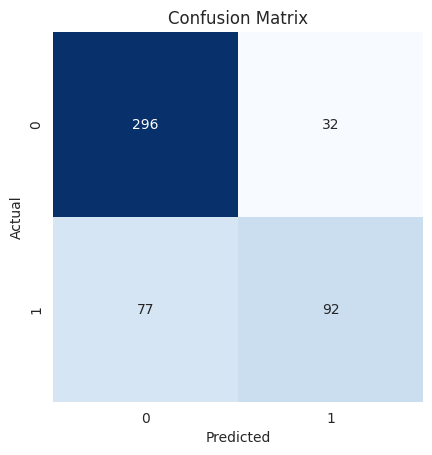

In [293]:
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [294]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy:.2f}")

Точность: 0.78


In [295]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Точность: {precision:.2f}")
print(f"Полнота: {recall:.2f}")


Точность: 0.74
Полнота: 0.54


In [296]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f"F1-мера: {f1:.2f}")


F1-мера: 0.63


In [297]:
df_copy.corr()

,Age,GraduateOrNot,AnnualIncome,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
Age,1.000000,0.027125,-0.020101,0.007359,-0.033159,-0.012779,0.061060
GraduateOrNot,0.027125,1.000000,0.108066,0.018811,-0.028120,0.062683,0.018934
AnnualIncome,-0.020101,0.108066,1.000000,-0.001149,0.353087,0.486043,0.396763
ChronicDiseases,0.007359,0.018811,-0.001149,1.000000,-0.043720,0.021238,0.018190
FrequentFlyer,-0.033159,-0.028120,0.353087,-0.043720,1.000000,0.277334,0.232103
EverTravelledAbroad,-0.012779,0.062683,0.486043,0.021238,0.277334,1.000000,0.433183
TravelInsurance,0.061060,0.018934,0.396763,0.018190,0.232103,0.433183,1.000000


### 10. Строим ROC-кривую


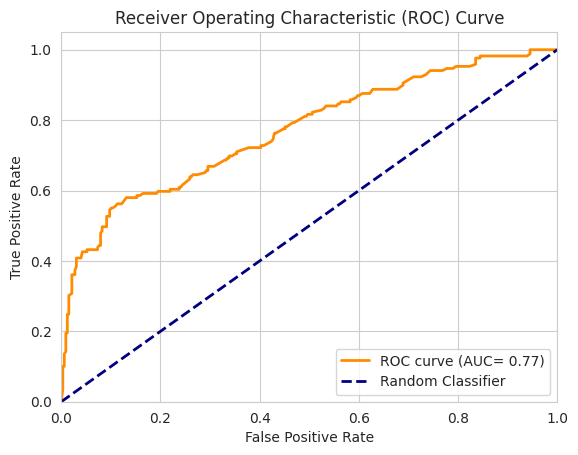

In [298]:
from sklearn.metrics import roc_curve, auc

# Получаем предсказанные вероятности для класса 1
y_score = model.predict_proba(X_test) [:, 1]

# Рассчитываем FPR, TPR и пороги
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# (Опционально) Рассчитываем AUC (Area Under Curve) площадь под кривой
roc_auc = auc(fpr, tpr)

# Строим график
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC= {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()